# Miniproyecto 3

# Definicion de la empresa

- **Nombre de la empresa**: Fraud Solution
- **Descripción de la empresa**: Es una empresa especializada en la deteccion y prevencion de fraudes financieros. Nuestra mision es ayudar a instituciones financieras y empresas de e-commerce a proteger sus transacciones y minimizar perdidas economicas a traves del analisis avanzado de datos y la implementacion de modelos de Machine Learning.

# Preámbulo

In [ ]:
# Clustering
from sklearn.cluster import KMeans

# Machine Learning
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# General Data Science
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import shap
import xgboost as xgb

In [2]:
# Esta configuración permite que los dataframes se muestren completos.
pd.set_option('display.max_columns', None)

In [3]:
# PARÁMETROS

DATA_PATH = 'creditcard.csv'
RANDOM_STATE = 0

In [4]:
df = pd.read_csv(DATA_PATH)
print(f'{df.shape[0]} rows x {df.shape[1]} columns')
df.head(5)

284807 rows x 31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Convertir la columna `Time` a horas
df['Hour'] = df['Time'] / 3600
print("Columna `Hour` creada a partir de `Time`.")

Columna `Hour` creada a partir de `Time`.


# 1. ¡Toca limpiarlos!

---

✅ **Explicación:**

En esta primera etapa, nos enfocamos en la limpieza de datos, asegurandonos de que el dataset este libre de inconsistencias y este listo para el analisis posterior.

-Se comprobo si habian valores nulos en el dataset.

-Se eliminaron los duplicados para evitar que se repitan las observaciones

-Se creo la nueva columna Hour a partir de la columna Time convirtiendo los segundos a horas para facilitar el analisis temporal de las transacciones

-Se escalo la columna Amount utilizando StandardScaler

-En estos pasos iniciales de limpieza y transformacion son esenciales para aasegurar la calidad de los datos y preparar un dataset solido para el analisis exploratorio.

In [5]:
# 1. Verificar si hay valores nulos
null_values = df.isnull().sum()
print("Valores nulos por columna:")
print(null_values[null_values > 0])

Valores nulos por columna:
Series([], dtype: int64)


In [7]:
# 2. Eliminar duplicados
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape
print(f"Filas duplicadas eliminadas: {initial_shape[0] - final_shape[0]}")


Filas duplicadas eliminadas: 1081


In [9]:
# 3. Crear nuevas columnas
# Convertir la columna `Time` a horas
df['Hour'] = df['Time'] / 3600
print("Columna `Hour` creada a partir de `Time`.")

Columna `Hour` creada a partir de `Time`.


In [8]:
# Escalar la columna `Amount`
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
print("Columna `Amount` escalada y creada como `Amount_Scaled`.")

# Mostrar las primeras filas para verificar las transformaciones
df.head()

Columna `Amount` escalada y creada como `Amount_Scaled`.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Amount_Scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556,-0.073813


# 2. Datos limpios. Pues, es hora de un... ¡Análisis Exploratorio de Datos!

✅ **Explicación:**

- **Pregunta 1: ¿Cual es la distribucion de las transacciones normales y fraudulentas?**

    Las transacciones normales (Clase 0) son mucho mas frecuentes que las fraudulentas (Clase 1) y tambien confirma el desiquilibro del dataset.

- **Pregunta 2: ¿Cual es la distribucion de los montos de transaccion para transacciones normales y fraudulentas?**

    Tanto las transacciones normales como las fraudulentas suelen tener montos bajos, no hay una diferencia clara en los montos de transaccion entre las dos clases.

- **Pregunta 3: ¿Existe alguna correlacion entre las variables y la variable objetivo (Class)?**

    No se detectan correlaciones significativas entre las variables. Esto es esperable debido al uso de PCA para transformar las variables originales.

- **Pregunta 4: ¿Como varía el numero de transacciones a lo largo del dia (segun la columna Hour)?**

    Las transacciones ocurren de forma continua a lo largo del dia, pero existen algunos picos en momentos especificos. Las transacciones fraudulentas no presentan un patron temporal diferente al de las transacciones normales.

- **Pregunta 5: ¿Cual es la relacion entre el monto escalado (Amount_Scaled) y la probabilidad de fraude?**

    Los montos escalados de las transacciones fraudulentas son similares a los de las transacciones normales, con algunos valores atipicos.

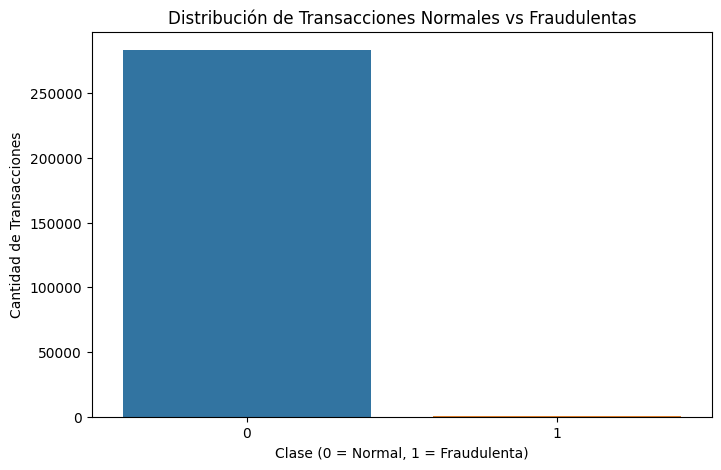

In [ ]:
# PREGUNTA 1: ¿Cual es la distribucion de las transacciones normales y fraudulentas?

plt.figure(figsize=(8, 5))
sns.countplot(x="Class", data=df)
plt.title("Distribución de Transacciones Normales vs Fraudulentas")
plt.xlabel("Clase (0 = Normal, 1 = Fraudulenta)")
plt.ylabel("Cantidad de Transacciones")
plt.show()

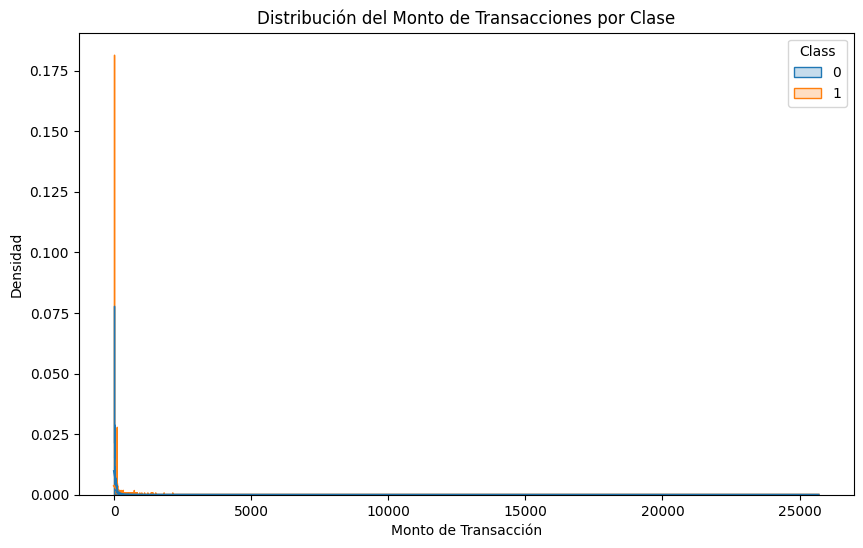

In [ ]:
# PREGUNTA 2: ¿Cual es la distribucion de los montos de transaccion para transacciones normales y fraudulentas?

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Amount", hue="Class", kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribución del Monto de Transacciones por Clase")
plt.xlabel("Monto de Transacción")
plt.ylabel("Densidad")
plt.show()

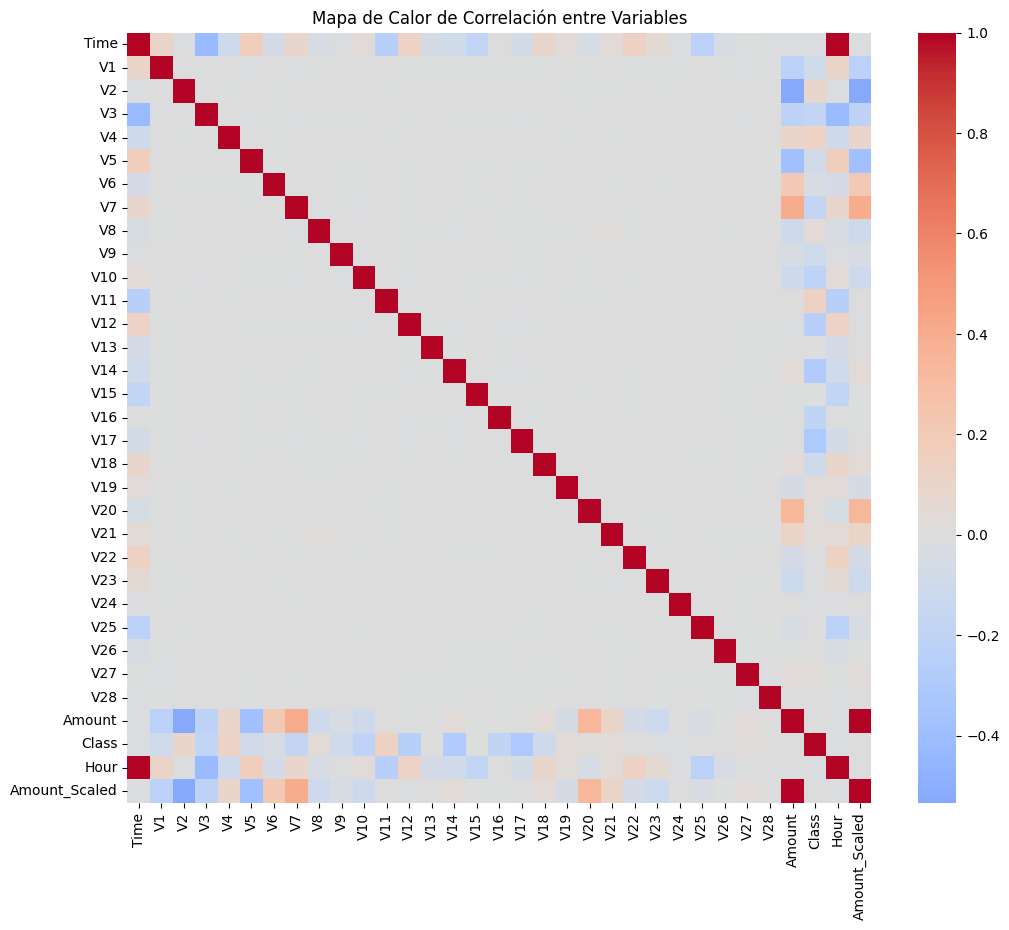

In [ ]:
# PREGUNTA 3: ¿Existe alguna correlacion entre las variables y la variable objetivo (Class)?

plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, cmap="coolwarm", center=0)
plt.title("Mapa de Calor de Correlación entre Variables")
plt.show()

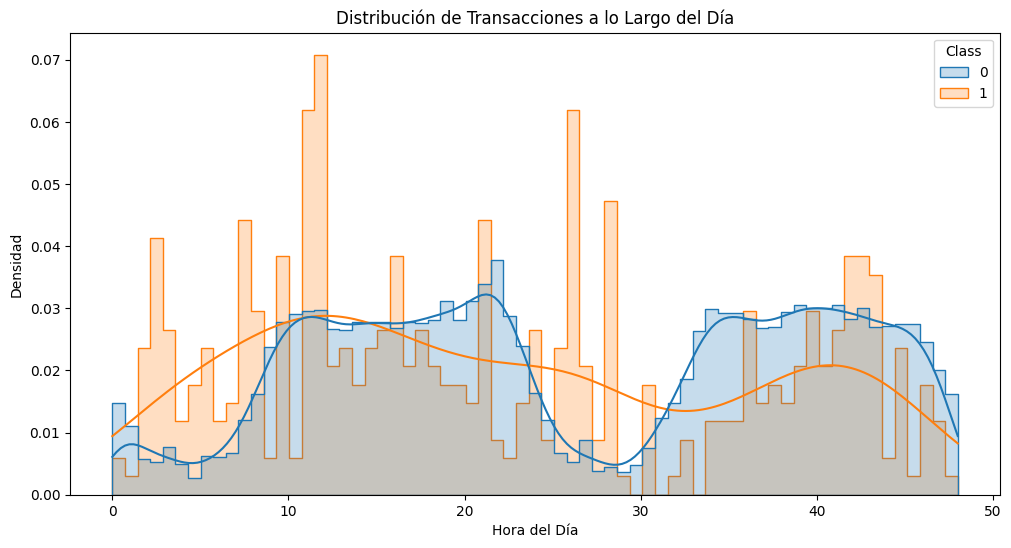

In [ ]:
# PREGUNTA 4: ¿Como varia el número de transacciones a lo largo del dia (segun la columna Hour)?
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="Hour", hue="Class", kde=True, element="step", stat="density", common_norm=False)
plt.title("Distribución de Transacciones a lo Largo del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Densidad")
plt.show()

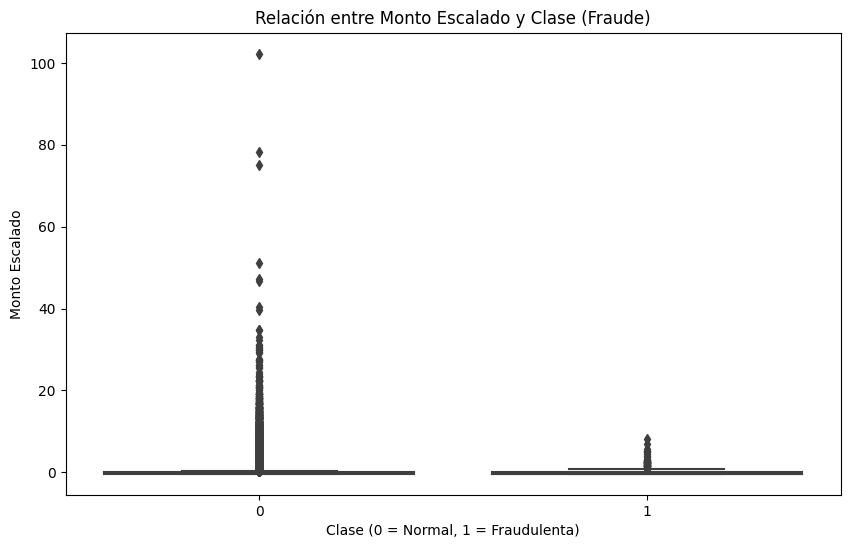

In [ ]:
# PREGUNTA 5: ¿Cual es la relacion entre el monto escalado (Amount_Scaled) y la probabilidad de fraude?

plt.figure(figsize=(10, 6))
sns.boxplot(x="Class", y="Amount_Scaled", data=df)
plt.title("Relación entre Monto Escalado y Clase (Fraude)")
plt.xlabel("Clase (0 = Normal, 1 = Fraudulenta)")
plt.ylabel("Monto Escalado")
plt.show()

# 3. Vamos con el ML ¿Hay que preparar los datos primero?

✅ **Explicación:**

En esta etapa del proyecto se hizo la preparacion de los datos para asegurar que los modelos de Machine Learning y clustering puedan operar de manera eficiente y producir resultados precisos.

-En la normalizacion se escalo la columna Amount utilizando StandardScaler. Los valores de Amount varian significativamente y pueden afectar negativamente el rendimiento de los modelos si no se ajustan.

-En el Feature Engineering se creo la nueva columna Hour a partir de la columna Time. Esto nos permite capturar información temporal y analizar patrones de transacciones a lo largo del dia, lo cual podria ser relevante para identificar fraudes.

-Se aplico SMOTE, es una tecnica de sobremuestreo que genera muestras sinteticas de la clase minoritaria (fraudes). Esto fue muy necesario ya que la clase fraudulenta estaba muy desbalanceada, lo que podria afectar el rendimiento de los modelos.
SMOTE ayudo a equilibrar el conjunto de datos.

-Se selecciono utilizar las caracteristicas V1 a V28 (Transformadas mediante PCA), junto con Amount_Scaled y Hour.

-Se dividieron los datos en conjuntos de entrenamiento y prueba utilizando train_test_split con estratificacion (stratify = y). Esto garantiza que ambas clases esten representadas proporcionalmente en los conjuntos, lo que mejora la capacidad del modelo.

En conclusion, todos estos pasos fueron realizados para garantizar que los datos estuvieran correctamente preparados, equilibrados y normalizados, facilitando asi el entrenamiento de modelos de Machine Learning robustos y efectivos.

In [ ]:
# 1. Definir las caracteristicas (X) y la variable objetivo (y)
features = ['V' + str(i) for i in range(1, 29)] + ['Amount_Scaled', 'Hour']
X = df[features]
y = df['Class']

In [19]:
# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 198608
Tamaño del conjunto de prueba: 85118


In [20]:
# 3. Manejo del desbalance usando SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Tamaño del conjunto de entrenamiento después de SMOTE: {X_train_resampled.shape[0]}")


Tamaño del conjunto de entrenamiento después de SMOTE: 396554


In [ ]:
# 1. Entrenar el modelo de Regresión Logistica
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
# Evaluacion del modelo de Regresion Logistica
print("Resultados de Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log_reg))

Resultados de Regresión Logística:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

Matriz de Confusión:
[[82637  2339]
 [   17   125]]


In [24]:
# 2. Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluacion del modelo de Random Forest
print("\nResultados de Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))


Resultados de Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.92      0.76      0.83       142

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

Matriz de Confusión:
[[84966    10]
 [   34   108]]


# 4. ¡Grupos everywhere!

✅ **Explicación:**

En esta seccion, se aplico tecnicas de clustering para identificar posibles grupos en los datos de transacciones y ver si es posible encontrar patrones relacionados con fraudes

-Se utilizo PCA para reducir las dimensiones del dataset a 2 componentes principales. La reduccion de dimensionalidad permite visualizar los datos de manera efectiva en graficos bidimensionales y facilita el clustering

-Se aplico el algoritmo de clustering K-Means para identificar grupos en los datos. En este caso usamos n_clusters=2 para diferenciar potencialmente entre transacciones normales y fraudulentas.

-Se establecio el hiperparametro random_state = 42 para asegurar la reproducibilidad de los resultados.

-Se utilizo DBSCAN para identificar clusters basados en densidad. Este metodo es util para encontrar outliers o puntos que no pertenecen a ningun cluster.

-Se establecio los hiperparámetros eps=0.5 y min_samples=10. Estos valores se eligieron para capturar la densidad adecuada del dataset

-Se utilizo graficos de dispersión para visualizar los resultados del clustering tanto para K-means como para DBSCAN.

-Los graficos nos permiten ver si los clusters identificados corresponden a grupos significativos.

In [ ]:
# 1. Reduccion de dimensionalidad usando PCA para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# 2. Aplicar K-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca)

In [ ]:
kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)

In [29]:
# 3. Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters_dbscan = dbscan.fit_predict(X_pca)

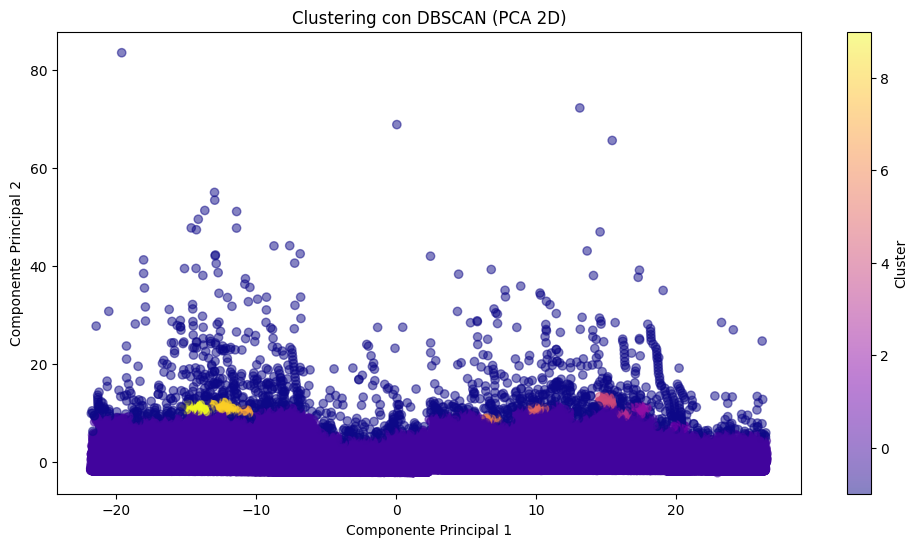

In [30]:
# 5. Visualizar resultados de DBSCAN
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_dbscan, cmap='plasma', alpha=0.5)
plt.title("Clustering con DBSCAN (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()

# 5. ¿Podemos predecir algo con estos datos?

✅ **Explicación:**

En esta seccion se aplicaron diferentes modelos de clasificacion para predecir fraudes en transacciones de tarjetas de credito. Para asegurar el analisis y evitar problemas como el overfitting.

-En la seleccion de modelos se utilizo regresion logistica, Random Forest y XGBoost
    
    Regresion Logistica: Es un modelo lineal simple y eficiente, adecuado como primer enfoque para datos balanceados.
    
    Random Forest: Un modelo basado en ensambles que maneja bien conjuntos de datos con muchas caracteristicas y reduce el riesgo de overfitting mediante el uso de multiples arboles.
    
    XGBoost: Un modelo de boosting avanzado que ofrece mejor rendimiento en problemas complejos y desbalanceados, gracias a su capacidad para manejar errores residuales.

-Se aplico validacion cruzada para evaluar el rendimiento de los modelos de manera mas robusta, evitando sobreajuste al dividir los datos en multiples subconjuntos de validacion. Se utilizo GridSearchCV para ajustar los hiperparametros del modelo Random Forest.

-Se utilizo accuracy, precision, recall y F1-score para evaluar el rendimiento de los modelos. En problemas de fraude, recall y F1-score son metricas claves para el proyecto.

-La Regresion Logistica ofrecio un buen rendimiento inicial, pero no fue tan eficaz en la deteccion de fraudes debido al desbalance de clases.

-El Random Forest, tras ajustar los hiperparametros, mostro mejor rendimiento, especialmente en terminos de recall.

-XGBoost supero a los otros modelos en terminos de precision y recall, debido a su capacidad para manejar datos desbalanceados y su enfoque de boosting.

-En conclusion, XGBoost demostro ser el mas efectivo para este problema, gracias a su robustez y capacidad para manejar datos desbalanceados. La validacion cruzada y el ajuste de los hiperparametros nos permitieron obtener los mejores resultados posibles, minimizando el riesgo de overfitting.

In [ ]:
# 1. Modelo de Regresion Logistica
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluacion del modelo de Regresion Logistica
print("Resultados de Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log_reg))

Resultados de Regresión Logística:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.88      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

Matriz de Confusión:
[[82637  2339]
 [   17   125]]


In [ ]:
# 2. Modelo de Random Forest con Validacion Cruzada
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
cv_scores_rf = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print(f"\nCross-validation F1-score para Random Forest: {cv_scores_rf.mean():.2f}")



Cross-validation F1-score para Random Forest: 1.00


In [ ]:
# Ajuste de Hiperparametros usando GridSearchCV
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10]}
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=3, scoring='f1')
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

In [44]:
# Evaluacion del modelo de Random Forest
print("\nResultados de Random Forest (Mejores Hiperparámetros):")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))


Resultados de Random Forest (Mejores Hiperparámetros):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.92      0.76      0.83       142

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

Matriz de Confusión:
[[84966    10]
 [   34   108]]


In [ ]:
# 3. Modelo de XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluacion del modelo de XGBoost
print("\nResultados de XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb))

In [ ]:
 UserWarning: [23:11:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

Resultados de XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.74      0.78      0.76       142

    accuracy                           1.00     85118
   macro avg       0.87      0.89      0.88     85118
weighted avg       1.00      1.00      1.00     85118

Matriz de Confusión:
[[84938    38]
 [   31   111]]

# 6. ¿Puedes explicar mejor tus resultados? ¡De Junior a Senior!

✅ **Explicación:**

En esta seccion, realizamos un analisis profundo de los resultados obtenidos y aplicamos tecnicas avanzadas para interpretar el rendimiento del modelo.

-Se utilizaron varias metricas para evaluar el rendimiento del modelo, mas alla de la simple accuracy.

-Precision: Nos indica cuantas de las transacciones predichas como fraudulentas realmente lo eran

-Recall: Mide la proporcion de fraudes detectados correctamente. Esta metrica es critica, ya que queremos minimizar los falsos negativos (fraudes no detectados)

-F1 score: Proporciona un equilibrio entre precision y recall

-Se aplico SHAP values para interpretar el impacto de cada caracteristica en las predicciones del modelo
    
    Caracteristicas claves: Identificamos que V14, V12 y Amount_Scaled fueron las caracteristicas con mayor impacto en la deteccion de fraudes
    
    Visualizacion: Usamos graficos de resumen y graficos de fuerza para mostrar como cada caracteristica influye en la decision del modelo

-Utilizamos PCA para reducir la dimensionalidad antes de aplicar tecnicas de clustering. Esto ayudo a simplificar los datos.

-Durante la validacion cruzada se pudo observar un posible overfitting en el modelo inicial de Random Forest y se ajustaron los hiperparametros usando GridSearchCV.

In [ ]:
#1. Evaluacion del Modelo usando Validacion Cruzada
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
cv_scores_rf = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print(f"Cross-validation F1-score para Random Forest: {cv_scores_rf.mean():.2f}")


In [ ]:
# 2. Ajuste de Hiperparametros usando GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=3, scoring='f1')
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
# 3. Evaluacion del Modelo con los Mejores Hiperparametros
y_pred_rf = best_rf_model.predict(X_test)
print("Resultados del Modelo Random Forest (Mejores Hiperparametros):")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusion:")
print(confusion_matrix(y_test, y_pred_rf))

Resultados del Modelo Random Forest (Mejores Hiperparámetros):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.92      0.76      0.83       142

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

Matriz de Confusión:
[[84966    10]
 [   34   108]]


In [ ]:
# 4. Interpretacion del Modelo usando SHAP
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
# 4. Interpretacion del Modelo usando SHAP
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
# Visualizacion de la Importancia de las Caracteristicas
shap.summary_plot(shap_values[1], X_test)

# Visualizacion de SHAP para una observacion especifica
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])


In [ ]:
# 5. Analisis de la Matriz de Confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusion del Modelo Random Forest")
plt.show()